# Лабораторная работа №8
## Решение краевой задачи второго порядка
#### В работе численно решается дифференциальное уравнение второго порядка с заданными на концах условиях методом стрельбы 
#### В качестве примера решено упражнение X1.9.2 б) сборника Аристовой и Лобанова:

$$y'' + \dfrac {0.5} {1-0.5y} (y')^2 = 0, ~~ 0 < x \leq 1 $$

#### Краевые условия:
$$y(0) = y_0, ~~~~~y(1) = y_1$$
$$y_0 = 0.25; ~~0.5; ~~1.5; ~~1.8; ~~1.9; ~~1.95; ~~~~y_1 = 0.$$

#### Данное уравнение можно представить в виде системы:
$$
	\begin{cases}
		y' = z, \\
        z' = \dfrac {0.5} {0.5y - 1} z^2
    \end{cases}
$$
#### Начальные условия:
$$y(0) = y_0, ~~ z(0) = \alpha, ~~~~~\alpha :~~~ y(1, \alpha) = 0$$


#### С помощью метода стрельбы краевую задачу приведем к задаче Коши и найдем $y = y(x, \alpha)$
#### Задача Коши решается методом Рунге-Кутты 4 порядка, параметр $\alpha$ вычисляется методом Ньютона:
$$\psi(\alpha) = y(1, \alpha) - y_1 = 0$$
$$\alpha_{k+1} = \alpha_k - \dfrac{\psi(\alpha_k)}{\psi'(\alpha_k)}$$

#### В качестве первой итерации в методе Ньютона $\alpha_0$ определяется, как $ \alpha_0 = \dfrac {y_1 - y_0}{x_1 - x_0}$.
#### Это логично, поскольку $\alpha_0 = z = y'_x(x_0, \alpha_0)$ - угол наклона кривой

#### Графики решений представлены ниже.

In [45]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.001
step = 0.001

x_0 = 0
x_1 = 1
x = np.arange(x_0, x_1, step)
y_0_list = [0.25, 0.5, 1.5, 1.8, 1.9, 1.95]
y_1 = 0


def Function(y):
    return np.array([y[1], 0.5/(0.5 * y[0] - 1) * y[1] ** 2])

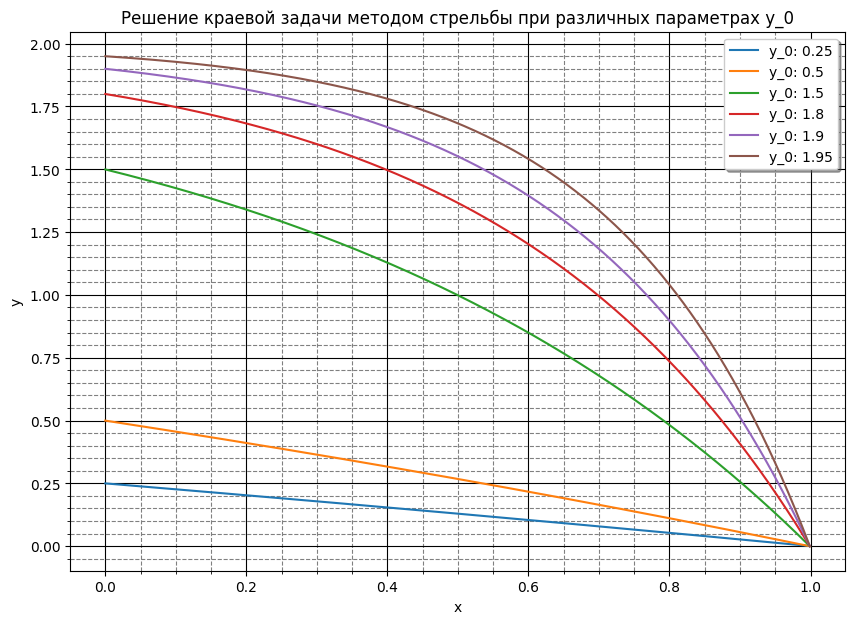

In [49]:
def RungeKuttaMethod(y_0, z_0):
    y = np.array([y_0, z_0])
    y_kutta = np.array([[]]).reshape(-1, 2)

    for _ in x:
        k_1 = Function(y) * step
        k_2 = Function(y + k_1 / 2) * step
        k_3 = Function(y - k_1 + 2 * k_2) * step
        delta_y = (k_1 + 4 * k_2 + k_3) / 6
        y = y + delta_y
        y_kutta = np.append(y_kutta, [y], axis=0)

    return y_kutta[:, 0]

def ShootingMethod(y_0):
    alpha_0 = (y_1 - y_0) / (x_1 - x_0)
    alpha_1 = alpha_0 / 2

    y_shooting = RungeKuttaMethod(y_0, alpha_0)
    y = RungeKuttaMethod(y_0, alpha_1)
    while (abs(y[-1] - y_1) > epsilon):
        alpha = alpha_1 - (y[-1] - y_1) * (alpha_1 - alpha_0) / (y[-1] - y_shooting[-1])
        alpha_0 = alpha_1
        alpha_1 = alpha
        y_shooting = RungeKuttaMethod(y_0, alpha_0)
        y = RungeKuttaMethod(y_0, alpha_1)

    return y

def PlotGraph(x, y_list):
    fig, ax = plt.subplots(figsize=[10, 7])
    ax.set_title("Решение краевой задачи методом стрельбы при различных параметрах y_0")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    for i in range(len(y_list)):
        ax.plot(x, y_list[i], label="y_0: " + str(y_0_list[i]))

    ax.legend(shadow=True)
    plt.minorticks_on()
    plt.grid(which='major', color='black', linestyle='-')
    plt.grid(which='minor', color='0.5', linestyle='--')

def main():
    y = list(list())
    for y_list in y_0_list:
        y.append(ShootingMethod(y_list));

    PlotGraph(x, y)

main()